## Introduction
Human body is a complex and fascinating machine. According to a [2016 research](https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.1002533), there are 30 trillion cells in a 70kg man and and along with these cells, we are inhabited with almost the same number of bacterial cells. Other than bacteria we are also colonised by fungi, protists and viruses. These microbes govern a range of functions in health, disease and our behaviour. So, how about taking a journey and analyse this amazing world of human microbiota through a lens of data science?
In this kernel, we will explore a data set that is available on Amazon Web Services (AWS). The data has been collected from 300 individuals and various genetic analysis have been done to analyse the microbes that inhabit various regions of the human body.

### Objective 
Here, we will try to answer some interesting questions, such as -
i) Human body site showing most microbial diversity 
ii) The most common genus (taxonomic rank that comes above species) of microorganism found in the human body
iii) Most ubiquitous microbe in the human body


### Import the necessary modules 
Import the necessary modules and read the data. 

In [1]:
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

micro=pd.read_csv('project_catalog.csv')
pd.set_option('display.max_rows', None, 'display.max_columns', None)


We then check how the data looks like by checking its the shape, its columns and the amount of missing data.

In [2]:
micro.shape

(2915, 17)

In [3]:
micro.columns 

Index(['HMP ID', 'GOLD ID', 'Organism Name', 'Domain', 'NCBI Superkingdom',
       'HMP Isolation Body Site', 'Project Status', 'Current Finishing Level',
       'NCBI Submission Status', 'NCBI Project ID', 'Genbank ID', 'Gene Count',
       'IMG/HMP ID', 'HOMD ID', 'Sequencing Center', 'Funding Source',
       'Strain Repository ID'],
      dtype='object')

In [4]:
micro.head(2)

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID
0,1,Gi03551,Abiotrophia defectiva ATCC 49176,BACTERIAL,Bacteria,oral,Complete,Level 3: Improved-High-Quality Draft,6. annotation (and sequence) public on NCBI site,33011,ACIN00000000,1950,643886181,HOMD: tax_389,Washington University Genome Sequencing Center,NIH-HMP Jumpstart Supplement,"ATCC 49176, CIP 103242"
1,4,Gi03555,Achromobacter piechaudii ATCC 43553,BACTERIAL,Bacteria,airways,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,46343,ADMS00000000,5755,647000200,NaN,Baylor College of Medicine,NIH-HMP Jumpstart Supplement,"ATCC 43553, CIP 55774, LMG 6100"


In [5]:
micro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 17 columns):
HMP ID                     2915 non-null int64
GOLD ID                    1783 non-null object
Organism Name              2915 non-null object
Domain                     2712 non-null object
NCBI Superkingdom          2751 non-null object
HMP Isolation Body Site    2915 non-null object
Project Status             2915 non-null object
Current Finishing Level    1579 non-null object
NCBI Submission Status     2915 non-null object
NCBI Project ID            2915 non-null int64
Genbank ID                 1579 non-null object
Gene Count                 2915 non-null int64
IMG/HMP ID                 2915 non-null int64
HOMD ID                    397 non-null object
Sequencing Center          2911 non-null object
Funding Source             2915 non-null object
Strain Repository ID       1377 non-null object
dtypes: int64(4), object(13)
memory usage: 387.2+ KB


We then check the statistics for Gene count (it has no missing data). From this, it is evident that minimum gene count is 0. How?

In [6]:
micro['Gene Count'].describe()

count    2915.000000
mean     1474.622642
std      1653.762393
min         0.000000
25%         0.000000
50%      1517.000000
75%      2489.500000
max      8490.000000
Name: Gene Count, dtype: float64

Digging further it is evident that 1331 Bacteria have 0 gene count followed by 8 eukaryotes and 6 viruses. 

In [7]:
micro_gene_count=micro[micro['Gene Count']==0]
micro_gene_count['NCBI Superkingdom'].value_counts()

Bacteria     1331
Eukaryota       8
Viruses         6
Name: NCBI Superkingdom, dtype: int64

I was curious to check if the reason of 0 gene count is correlated with the project status. It appears that the reason behid 0 gene count  for 1284bacteria, 4 eukaryotes, 1virus could be that the pojects are still in progress (when they released the data).

In [8]:
micro_no_gene_progress= micro[(micro['Gene Count']==0) & (micro['Project Status']=='In Progress')]
micro_no_gene_progress['NCBI Superkingdom'].value_counts()

Bacteria     1284
Eukaryota       4
Viruses         1
Name: NCBI Superkingdom, dtype: int64

But for 47 bacteria, 5 viruses, 4 eukaryotes the project has been completed. Thus, the reason could be a reporting error.

In [9]:
micro_no_gene_complete=micro[(micro['Gene Count']==0) & (micro['Project Status']=='Complete')]
micro_no_gene_complete['NCBI Superkingdom'].value_counts()

Bacteria     47
Viruses       5
Eukaryota     4
Name: NCBI Superkingdom, dtype: int64

Next, I found out that the microorganism with the highest gene count is *Streptomyces* sp. HGB0020, with 8490 genes and which lives in the gastrointestinal tract.

In [10]:
micro[micro['Gene Count']==8490]

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID
679,1211,Gi10716,Streptomyces sp. HGB0020,BACTERIAL,Bacteria,gastrointestinal_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,72491,AGER00000000,8490,0,NaN,Broad Institute,NIH-HMP Sequencing Center,BEI HM-789


Next, I found that the research found 16 human body sites, with most diversity shown in the gastrointestinal tract.

In [11]:
micro['HMP Isolation Body Site'].nunique()

16

In [12]:
micro['HMP Isolation Body Site'].value_counts()

gastrointestinal_tract    745
unknown                   654
urogenital_tract          529
oral                      347
skin                      267
airways                   236
blood                      75
bone                       27
other                      13
eye                         8
ear                         4
wound                       4
nose                        2
heart                       2
lymph_nodes                 1
liver                       1
Name: HMP Isolation Body Site, dtype: int64

Text(0.5,1,'Diversity of microorganisms at different body sites')

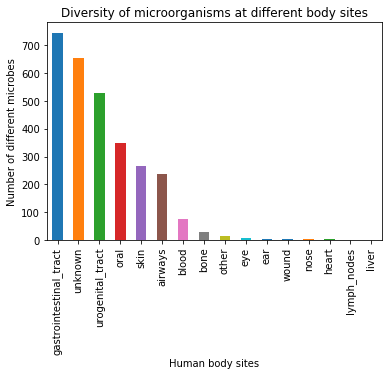

In [13]:
micro['HMP Isolation Body Site'].value_counts().plot(kind='bar')
plt.title('Distribution of microorganisms in various body sites')
plt.ylabel('Number of different microbes')
plt.xlabel('Human body sites')
plt.title('Diversity of microorganisms at different body sites')

Next, I was interested in finding the most common genus. A scientific name is made up of 2 parts - genus name followed by scientific name.

In [14]:
micro['Genus']= micro['Organism Name'].str.split(' ').str[0]
micro['species']=micro['Organism Name'].str.split(' ').str[1]
micro[['Genus','species']].head()

,Genus,species
0,Abiotrophia,defectiva
1,Achromobacter,piechaudii
2,Achromobacter,xylosoxidans
3,Acinetobacter,baumannii
4,Acinetobacter,calcoaceticus


There are 242 genera found, with *Streptococcus* being the most common genus in the human body.

In [15]:
micro['Genus'].nunique()

242

In [16]:
micro['Genus'].value_counts().head(10)

Streptococcus        268
Staphylococcus       260
Enterococcus         178
Corynebacterium      132
Propionibacterium    104
Lactobacillus         97
Clostridium           94
Prevotella            83
Bacteroides           73
Helicobacter          70
Name: Genus, dtype: int64

Before proceeding further, I checked for the unique values in 'NCBI Superkingdom' column. There are 3 observations labeled 'Error!!!' for this column.

In [17]:
micro.groupby('NCBI Superkingdom').count()

,HMP ID,GOLD ID,Organism Name,Domain,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID,Genus,species
NCBI Superkingdom,,,,,,,,,,,,,,,,,,
Archaea,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2
Bacteria,2732,1656,2732,2546,2732,2732,1448,2732,2732,1448,2732,2732,385,2728,2732,1296,2732,2732
Error!!!,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Eukaryota,8,8,8,8,8,8,4,8,8,4,8,8,0,8,8,2,8,8
Viruses,6,0,6,6,6,6,5,6,6,5,6,6,0,6,6,6,6,6


As Streptococcus species ( which are bacteria) are the ones with 'Error!!!' in NCBI superkingdom, I have replaced this 'Error!!!' with 'Bacteria'.

In [18]:
micro[micro['NCBI Superkingdom']=='Error!!!']

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID,Genus,species
2478,9176,Gi05045,Streptococcus downei F0415,BACTERIAL,Error!!!,oral,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,53567,AEKN00000000,2204,649990005,HOMD: tax_594,J. Craig Venter Institute,NIH-HMP Jumpstart Supplement,BEI HM-475,Streptococcus,downei
2481,9180,Gi05049,Streptococcus peroris ATCC 700780,BACTERIAL,Error!!!,oral,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,53059,AEVF00000000,1638,649990011,HOMD: tax_728,Baylor College of Medicine,NIH-HMP,ATCC 700780,Streptococcus,peroris
2487,9192,Gi05061,Streptococcus vestibularis F0396,BACTERIAL,Error!!!,oral,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,53573,AEKO00000000,1979,649990017,HOMD: tax_21,J. Craig Venter Institute,NIH-NIAID,BEI HM-561,Streptococcus,vestibularis


In [19]:
micro['NCBI Superkingdom'].replace('Error!!!', 'Bacteria', inplace=True)

To proceed further, I wanted to fill the missing values in Domain and NCBI superkingdom columns. One can infer the result of one column if the other column's value is known. 

In [20]:
micro[['Domain','NCBI Superkingdom']].isnull().sum()

Domain               203
NCBI Superkingdom    164
dtype: int64

But we cannot fill the missing values in either of these columns, if both values of the 2 columns are missing. For that I checked how many such observations are present. Then I removed those observations.

In [21]:
len(micro.loc[micro['Domain'].isnull()& micro['NCBI Superkingdom'].isnull()])

17

In [22]:
micro=micro.drop(micro[(micro['Domain'].isnull()) & (micro['NCBI Superkingdom'].isnull())].index)
micro.shape

(2898, 19)

**Bug** - As many of the same rows have missing values for NCBI Superkingdom and Domain columns. The following groupby followed by transform steps were not working and giving an error message. To overcome that I first replaced missing value with the string 'NaN' in NCBI Superkingdom and then proceeded to the next step of filling missing value in Domain column ( groupby 'NCBI Superkingdom' and then transform it).

In [23]:
micro['NCBI Superkingdom'].fillna('NaN', inplace=True)

In [24]:
print(micro.shape)
micro['Domain'] =micro.groupby('NCBI Superkingdom')['Domain'].transform(lambda x: x.fillna(x.mode().max()))
micro['Domain'].isnull().sum()

(2898, 19)


0

Next, I replaced the string 'NaN' using groupby and transform methods.

In [25]:
micro['NCBI Superkingdom']= micro.groupby('Domain')['NCBI Superkingdom'].transform(lambda x: x.replace('NaN', x.mode().max()))
micro.loc[micro['NCBI Superkingdom']=='NaN']

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID,Genus,species


After getting rid of the missing values in 'NCBI Superkingdom' and 'Domain' columns, I was keen in checking where all the different types of microbes such as Bacteria, eukaryotes, viruses and archeae are located in the human body. From the given probing, it is clear that bacteria are located in all 16 studied human body sites followed by eukaryotes in 5 body sites, followed by viruses and archaea. 

In [26]:
micro.groupby('NCBI Superkingdom')['HMP Isolation Body Site'].nunique().sort_values(ascending=False)

NCBI Superkingdom
Bacteria     16
Eukaryota     5
Viruses       1
Archaea       1
Name: HMP Isolation Body Site, dtype: int64

As bacteria are more ubiquitous in the human body. The diversity is most vast in gastrointentestinal tract.

In [27]:
bac=micro.loc[micro['Domain']=='BACTERIAL']
bac['HMP Isolation Body Site'].unique()

array(['oral', 'airways', 'urogenital_tract', 'skin',
       'gastrointestinal_tract', 'unknown', 'blood', 'eye', 'liver',
       'nose', 'wound', 'bone', 'ear', 'other', 'heart', 'lymph_nodes'],
      dtype=object)

Text(0.5,1,'Diversity of bacteria at different body sites')

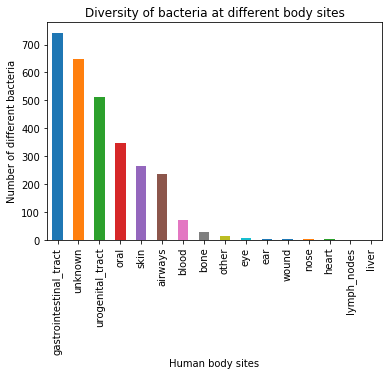

In [28]:
bac['HMP Isolation Body Site'].value_counts(ascending=False).plot(kind='bar')
plt.ylabel('Number of different bacteria')
plt.xlabel('Human body sites')
plt.title('Diversity of bacteria at different body sites')

More Eukaryotic diversity exist in the blood, followed by skin, airways, , wound, unknown.  

In [29]:
euk=micro.loc[micro['Domain']=='EUKARYAL']
euk['HMP Isolation Body Site'].unique()

array(['unknown', 'skin', 'blood', 'wound', 'airways'], dtype=object)

Text(0.5,1,'Diversity of eukaryotes at different body sites')

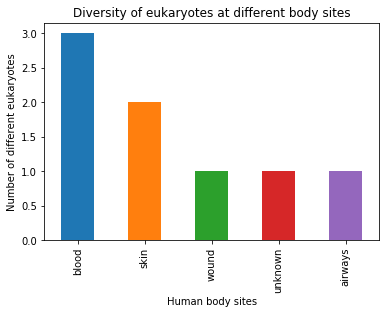

In [30]:
euk['HMP Isolation Body Site'].value_counts(ascending=False).plot(kind='bar')
plt.ylabel('Number of different eukaryotes')
plt.xlabel('Human body sites')
plt.title('Diversity of eukaryotes at different body sites')

The study didn't find any precise location for viruses. Although, some previous studies have found virueses in blood, skin.

In [31]:
vir=micro.loc[micro['Domain']=='VIRUS']
vir['HMP Isolation Body Site'].unique()

array(['unknown'], dtype=object)

Archaea is found primarily in the gastrointestinal tract.

In [32]:
arc=micro.loc[micro['Domain']=='ARCHAEAL']
arc['HMP Isolation Body Site'].unique()

array(['gastrointestinal_tract'], dtype=object)

Next question that comes to mind is which is the most ubiquitous organism found in this analysis.  Staphylococcus is the most ubiquitous among all, with 11 habitats- urogenital_tract, skin,  airways, unknown, gastrointestinal_tract, nose, blood, bone, eye, ear, other.

                   HMP Isolation Body Site
Genus                                     
Staphylococcus                          11
Streptococcus                           10
Corynebacterium                          9
Enterococcus                             9
Actinomyces                              9
Haemophilus                              8
Propionibacterium                        8
Fusobacterium                            7
Prevotella                               7
Porphyromonas                            6
Klebsiella                               6
Bifidobacterium                          6
Lactobacillus                            6
Pseudomonas                              6
Neisseria                                6
Bacteroides                              5
Gemella                                  5
Rothia                                   5


Text(0.5,1,'Number of habitats for different microorganisms')

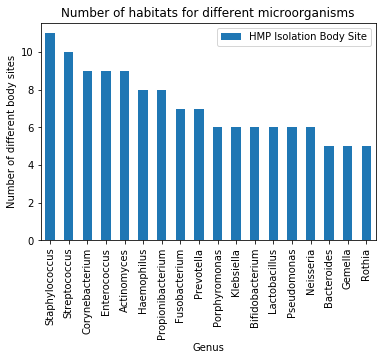

In [33]:
z=micro.groupby('Genus')['HMP Isolation Body Site'].nunique().sort_values(ascending=False)
y=pd.DataFrame(z)
w=y[y['HMP Isolation Body Site']>4]
print(w)
w.plot(kind='bar')
plt.ylabel('Number of different body sites')
plt.title('Number of habitats for different microorganisms')

In [34]:
staph=micro.loc[micro['Genus']=='Staphylococcus']
staph['HMP Isolation Body Site'].unique()

array(['urogenital_tract', 'skin', 'airways', 'unknown',
       'gastrointestinal_tract', 'nose', 'blood', 'bone', 'eye', 'ear',
       'other'], dtype=object)

Just to mention that this study, includes 2882 Bacteria, 8 eukaryotes, 6 viruses and 2 archaea.

In [35]:
micro['NCBI Superkingdom'].value_counts()

Bacteria     2882
Eukaryota       8
Viruses         6
Archaea         2
Name: NCBI Superkingdom, dtype: int64

Following is the list of names of viruses, eukaryotes and archaea.

In [36]:
viruses= micro[micro['NCBI Superkingdom'] =='Viruses']
viruses['Organism Name']

532            Actinomyces phage vB_Ana_GK1
2852    Pseudomonas phage F_HA0480sp/Pa1651
2853                Pseudomonas phage JBD18
2854                Pseudomonas phage JBD25
2855                Pseudomonas phage JBD26
2856                Pseudomonas phage JBD67
Name: Organism Name, dtype: object

In [37]:
eukaryotes= micro[micro['NCBI Superkingdom']=='Eukaryota']
eukaryotes['Organism Name']

601                  Exophiala dermatitidis NIH/UT8656
983                    Phialophora europaea CBS 101466
985     Mucor circinelloides f. circinelloides 1006PhL
999                     Pichia kudriavzevii CAB39-6420
1065                   Sporothrix schenckii ATCC 58251
2555                       Candida glabrata CAB52-4041
2556                   Candida tropicalis CAB54-6763-3
2557                   Candida parapsilosis CAB50-2638
Name: Organism Name, dtype: object

In [38]:
archaea= micro[micro['NCBI Superkingdom']=='Archaea']
archaea['Organism Name']

302    Methanobrevibacter smithii DSM 2374
303    Methanobrevibacter smithii DSM 2375
Name: Organism Name, dtype: object

### Conclusion
In this kernel we have performed EDA of the Human Microbiome dataset. Found- i) Gastrointestine shows most diversity of microbes, ii) *Streptomyces* sp. HGB0020 shows the maximum gene count in human, iii) *Streptococcus* is most common genus while *Staphylococcus* is most ubiquitous in humans.
